#  Decision Trees

In [1]:
# Initial imports
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = "C:/Users/VivoBook/Desktop/Classwork/capstoneproject-2022/Database/county_year_merged.csv"
county_year_merged = pd.read_csv(file_path)
county_year_merged.head()

,county,year,number_sales,sales_percentage,population,pop_percentage,county_count,state_count,total_incentives,county_max,state_max,total_max
0,Alameda,2015,5536,8.65,1630159,4.19,0,6,6,0,25500,25500
1,Alameda,2016,5327,7.35,1647332,4.21,0,6,6,0,25500,25500
2,Alameda,2017,7056,7.61,1659750,4.22,0,6,6,0,25500,25500
3,Alameda,2018,12578,8.12,1669659,4.23,2,6,8,5800,25500,31300
4,Alameda,2019,11781,8.05,1678926,4.25,4,6,10,15307,25500,40807


In [3]:
county_year_merged = county_year_merged.drop(columns=["county", "sales_percentage"])

In [4]:
# Define features set
X = county_year_merged.drop("number_sales", axis=1)
y = county_year_merged["number_sales"]

In [5]:
# Split into Train and Test sets, StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=75, train_size=0.80)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(361, 9)
(91, 9)
(361,)
(91,)


## Fitting the Random Forest Model

In [7]:
# Create and fit the random forest regressor instance
rf_model = RandomForestRegressor(random_state=75, n_estimators=500).fit(X_train_scaled, y_train)

## Making Predictions Using the Data

In [8]:
# Making predictions using the testing data
y_pred = rf_model.predict(X_test_scaled)
print(f"Training Data Score: {rf_model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {rf_model.score(X_test_scaled, y_test)}")

Training Data Score: 0.9696653740513151
Testing Data Score: 0.7723729630163212


## Rank Importance of Features

In [9]:
# Calculate feature importance in the Random Forest model.
feature_importances = rf_model.feature_importances_
feature_importances

array([0.01535658, 0.18106889, 0.12960892, 0.15291496, 0.00551814,
       0.1634756 , 0.3173362 , 0.0066303 , 0.02809041])

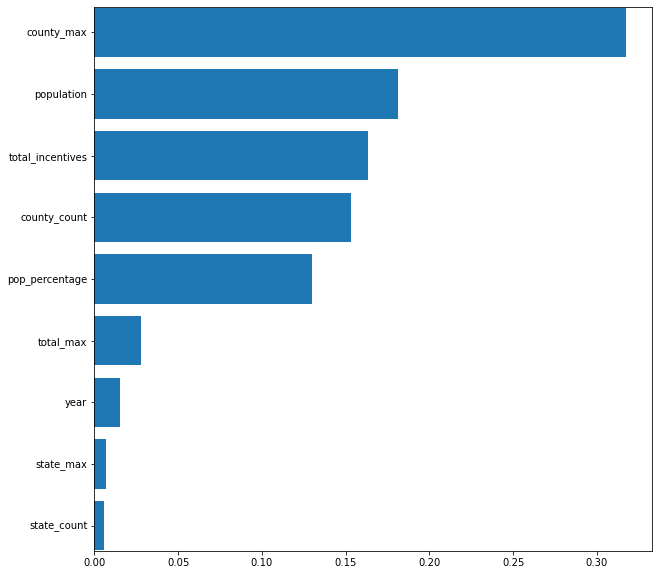

In [10]:
# Use the following code to plot the most important features
features = sorted(zip(X.columns, feature_importances), key = lambda x: x[1])
cols = [f[0] for f in features]
width = [f[1] for f in features]

fig, ax = plt.subplots()

fig.set_size_inches(10,10)
plt.margins(y=0.001)

ax.barh(y=cols[-10:], width=width[-10:])

plt.show()

# Visualize regression results

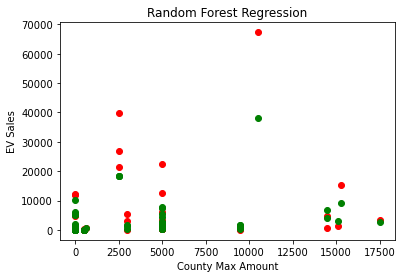

In [11]:
# Visualize model’s predictions for county_max
# Real values = red, predicted = green
# Code found here: https://cnvrg.io/random-forest-regression/
plt.scatter(X_test['county_max'].values, y_test, color = 'red')
plt.scatter(X_test['county_max'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('County Max Amount')
plt.ylabel('EV Sales')
plt.show() 

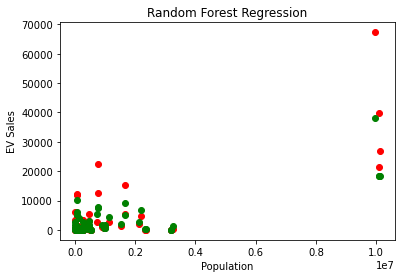

In [12]:
# Visualize model’s predictions for population
# Real values = red, predicted = green
plt.scatter(X_test['population'].values, y_test, color = 'red')
plt.scatter(X_test['population'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Population')
plt.ylabel('EV Sales')
plt.show() 

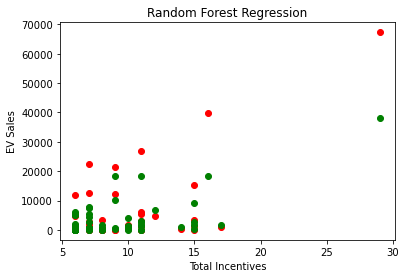

In [13]:
# Visualize model’s predictions for total_incentives
# Real values = red, predicted = green
plt.scatter(X_test['total_incentives'].values, y_test, color = 'red')
plt.scatter(X_test['total_incentives'].values, y_pred, color = 'green')
plt.title('Random Forest Regression')
plt.xlabel('Total Incentives')
plt.ylabel('EV Sales')
plt.show() 

# Gradient Booster Regression

In [14]:
# Try for better results based off stacked predictors
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
for i in [0.1, 0.01, 0.001]:
    for j in [100, 250, 500, 750]:
        gbr = GradientBoostingRegressor(learning_rate=i, n_estimators=j)
        gbr = gbr.fit(X_train_scaled, y_train)
        print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
        mse = mean_squared_error(y_test, gbr.predict(X_test_scaled))
        print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

        pred2 = gbr.predict(X_test_scaled)
        print("Accuracy on training set: %.3f" % gbr.score(X_train_scaled, y_train))
        print("Accuracy on test set: %.3f" % gbr.score(X_test_scaled, y_test))
        print("==============================================")

predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=100
The mean squared error (MSE) on test set: 21254423.6944
Accuracy on training set: 0.971
Accuracy on test set: 0.749
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=250
The mean squared error (MSE) on test set: 18264944.8958
Accuracy on training set: 0.996
Accuracy on test set: 0.784
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=500
The mean squared error (MSE) on test set: 18870891.7095
Accuracy on training set: 1.000
Accuracy on test set: 0.777
predict output for GradientBoostingRegressor: learning_rate=0.1, n_estimators=750
The mean squared error (MSE) on test set: 18109560.5458
Accuracy on training set: 1.000
Accuracy on test set: 0.786
predict output for GradientBoostingRegressor: learning_rate=0.01, n_estimators=100
The mean squared error (MSE) on test set: 43625904.9312
Accuracy on training set: 0.607
Accuracy on test set: 0.485
predict o

In [15]:
# Check best results in dataframe
X_test.loc[:, ['number_sales']] = pred2
X_test.head()

,year,population,pop_percentage,county_count,state_count,total_incentives,county_max,state_max,total_max,number_sales
416,2019,65312,0.17,8,6,14,9500,25500,35000,1697.278099
434,2021,474998,1.21,2,9,11,3000,27000,30000,1697.278099
140,2021,31377,0.08,2,9,11,500,27000,27500,1506.423671
118,2015,148525,0.38,0,6,6,0,25500,25500,1532.278457
285,2020,64110,0.16,0,9,9,0,27000,27000,1532.278457


In [16]:
# Testing parameters that give best results
gbt = GradientBoostingRegressor(learning_rate=0.1, n_estimators=750)

gbt = gbt.fit(X_train_scaled, y_train)
print("predict output for GradientBoostingRegressor: learning_rate={}, n_estimators={}".format(i, j))
mse = mean_squared_error(y_test, gbt.predict(X_test_scaled))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

pred2 = gbt.predict(X_test_scaled)
print("The best accuracy on training set: %.3f" % gbt.score(X_train_scaled, y_train))
print("The best accuracy on test set: %.3f" % gbt.score(X_test_scaled, y_test))

predict output for GradientBoostingRegressor: learning_rate=0.001, n_estimators=750
The mean squared error (MSE) on test set: 17931043.9282
The best accuracy on training set: 1.000
The best accuracy on test set: 0.788
